<a href="https://colab.research.google.com/github/maimonahST/Data-Science/blob/main/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Population of Saudi Arabia**

In [1]:
# import

import pandas as pd
import numpy as np

In [2]:
# load the dataset

df = pd.read_csv('/content/drive/MyDrive/DS/Population estimates by gender nationality and region 2010 - 2022_data.csv')
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,Madinah,"2,014",Female,Saudi,"562,344"
1,Tabouk,"2,010",Female,Saudi,"239,792"
2,Hail,"2,013",Female,Saudi,"211,727"
3,Eastern Region,"2,016",Male,Saudi,"1,308,467"
4,Al-Baha,"2,018",Female,Non-Saudi,"16,951"


In [3]:
df.tail()

,Region,Year,Gender,Nationality,Population estimates
671,Makkah,"2,015",Male,Saudi,"1,756,374"
672,Al-Baha,"2,015",Male,Saudi,"104,524"
673,Madinah,"2,021",Male,Saudi,"658,453"
674,Tabouk,"2,020",Female,Non-Saudi,"44,416"
675,Makkah,"2,015",Female,Saudi,"1,753,158"


# Preprocessing

In [4]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    object
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    object
dtypes: object(5)
memory usage: 26.5+ KB


### Convert the features of type "object" to numeric

In [5]:
# Remove non-numeric characters from the 'Year' and 'Population estimates' columns
df['Year'] = df['Year'].str.replace(',', '')
df['Population estimates'] = df['Population estimates'].str.replace(',', '')

# Convert the 'Year'and 'Population estimates' columns to int64
df['Year'] = df['Year'].astype('int64')
df['Population estimates'] = df['Population estimates'].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.5+ KB


In [6]:
# encode categorical col
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Al-Baha': 0, 'Al-Jouf': 1, 'Aseer': 2, 'Eastern Region': 3, 'Hail': 4, 'Jazan': 5, 'Madinah': 6, 'Makkah': 7, 'Najran': 8, 'Northern Region': 9, 'Qaseem': 10, 'Riyadh': 11, 'Tabouk': 12}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    int64 
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 26.5+ KB


In [7]:
df['Gender'] = le.fit_transform(df['Gender'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Female': 0, 'Male': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    int64 
 1   Year                  676 non-null    int64 
 2   Gender                676 non-null    int64 
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 26.5+ KB


In [8]:
df['Nationality'] = le.fit_transform(df['Nationality'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

df.info()

Label Mapping:
{'Non-Saudi': 0, 'Saudi': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Region                676 non-null    int64
 1   Year                  676 non-null    int64
 2   Gender                676 non-null    int64
 3   Nationality           676 non-null    int64
 4   Population estimates  676 non-null    int64
dtypes: int64(5)
memory usage: 26.5 KB


# Statistical Analysis

In [9]:
# describe the dataset
df.describe()

,Region,Year,Gender,Nationality,Population estimates
count,676.000000,676.000000,676.00000,676.00000,6.760000e+02
mean,6.000000,2016.000000,0.50000,0.50000,5.587169e+05
std,3.744428,3.744428,0.50037,0.50037,7.062714e+05
min,0.000000,2010.000000,0.00000,0.00000,1.430400e+04
25%,3.000000,2013.000000,0.00000,0.00000,1.098975e+05
50%,6.000000,2016.000000,0.50000,0.50000,2.495590e+05
75%,9.000000,2019.000000,1.00000,1.00000,6.180745e+05
max,12.000000,2022.000000,1.00000,1.00000,3.406281e+06


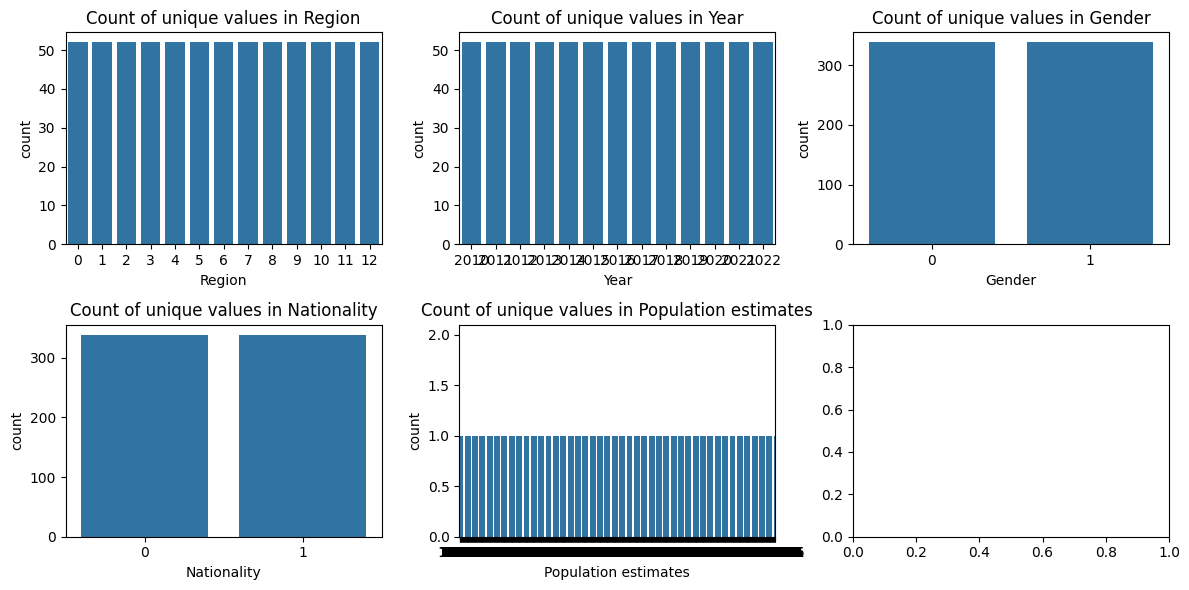

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot count of unique values for each column
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Count of unique values in {col}')

plt.tight_layout()
plt.show()


### Interquartile range (IQR)

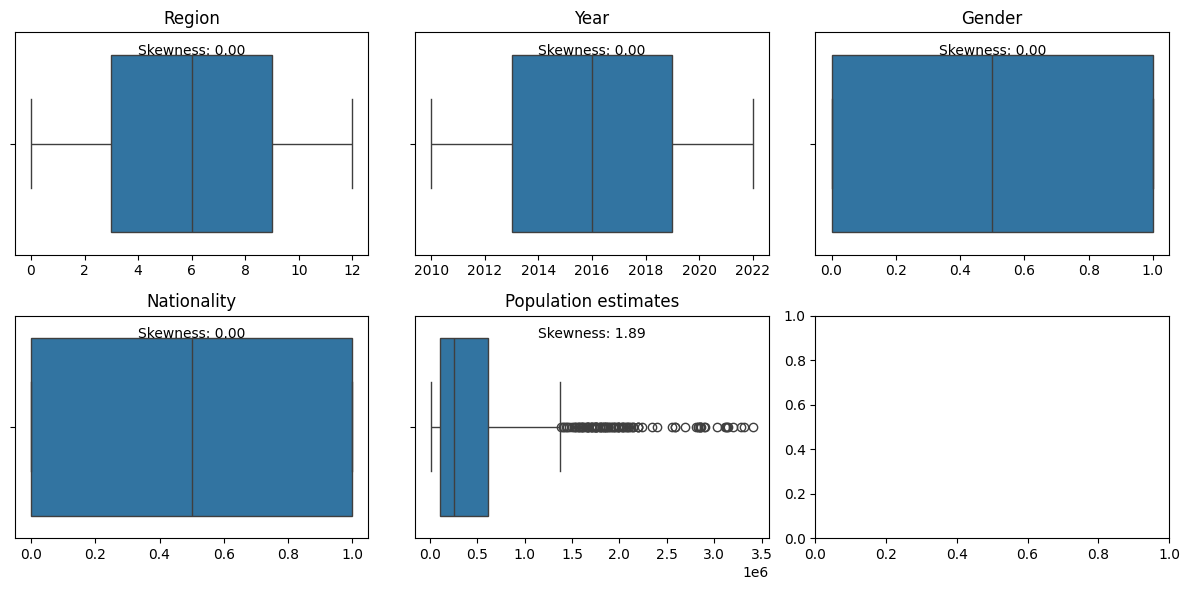

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot box plots for each column
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]

    # Create a box plot for the feature
    sns.boxplot(x=df[col], ax=ax)

    # Add skewness value as text on the plot
    skewness_value = df[col].skew(axis=0, skipna=True)
    ax.text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', transform=ax.transAxes, ha='center')

    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()



### Measures of shape (Skewness)

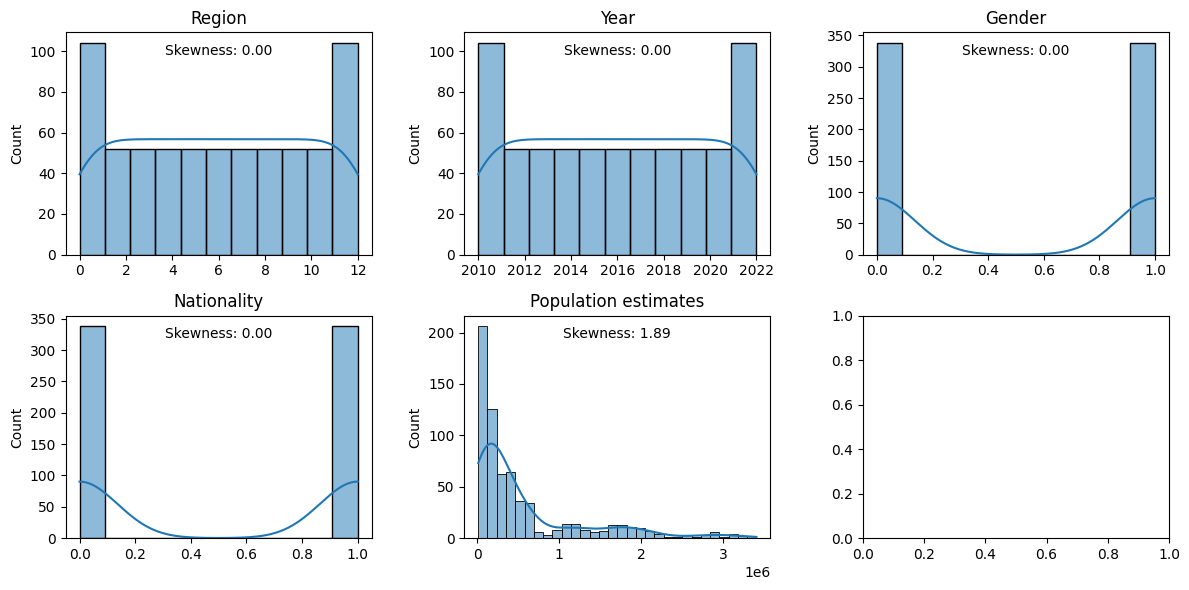

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot distribution and skewness for each column
for i, col in enumerate(df.columns):
    ax = axes[i // 3, i % 3]

    # Create a histogram for the feature
    sns.histplot(df[col], kde=True, ax=ax)

    # Add skewness value as text on the plot
    skewness_value = df[col].skew(axis=0, skipna=True)
    ax.text(0.5, 0.9, f'Skewness: {skewness_value:.2f}', transform=ax.transAxes, ha='center')

    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


### Correlation matrix

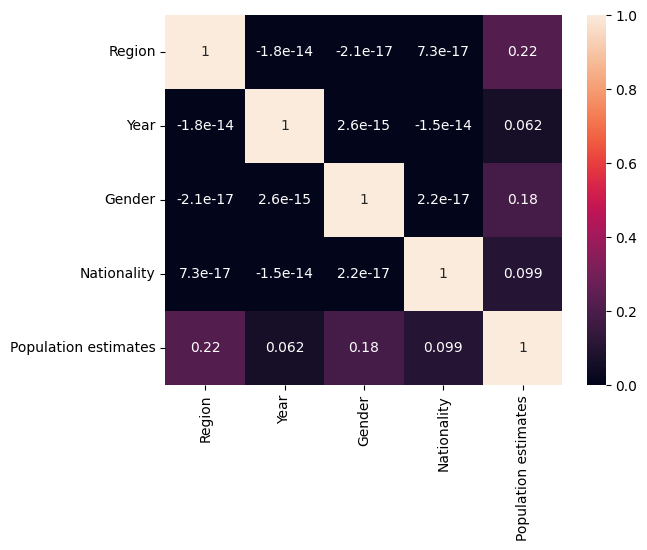

In [13]:
# correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()


# Split the dataset

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Population estimates', axis=1)
y = df['Population estimates']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (540, 4)
y_train shape: (540,)
X_test shape: (136, 4)
y_test shape: (136,)


# Build and train ML models

*   R2 = 1: Perfect prediction.
*   R2 = 0: The model doesn't explain any variability in the target variable.
*   R2 < 0: The model performs worse than a simple mean model.

## SVR Model

In [15]:
# Define the SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Evaluate the model on the test set
svr_score = svr_model.score(X_test, y_test)
-0

# Print the model performance
print("SVR Model Performance:")
print(f"Score: {svr_score:.2f}")

SVR Model Performance:
Score: -0.18


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the hyperparameter grid
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the best model and its performance
print("Best Model:")
print(best_model)
print(f"Best Score: {best_score:.2f}")

In [ ]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")